In [2]:
import torch
import scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('./datasets/user_behavior_dataset.csv')

In [4]:
df.head()

# Perhaps there are 2 interesting things to predict. Can try predicting:
# - User Behavior Class (Classification)
# - Age: Linear Regression


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0
Age,700.0,38.482857,12.012916,18.0,28.00,38.0,49.00,59.0
User Behavior Class,700.0,2.990000,1.401476,1.0,2.00,3.0,4.00,5.0


In [9]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [13]:
# df = df.drop(columns=['User ID'])
df.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class'],
      dtype='object')

In [16]:
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns if col != "User Behavior Class"]
numerical_columns

['App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age']

In [17]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns

,Device Model,Operating System,Gender
0,Google Pixel 5,Android,Male
1,OnePlus 9,Android,Female
2,Xiaomi Mi 11,Android,Male
3,Google Pixel 5,Android,Male
4,iPhone 12,iOS,Female
...,...,...,...
695,iPhone 12,iOS,Male
696,Xiaomi Mi 11,Android,Male
697,Google Pixel 5,Android,Female
698,Samsung Galaxy S21,Android,Male


In [18]:
for col in categorical_columns:
    print(f'{col}: {df[col].unique()}')

Device Model: ['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']
Operating System: ['Android' 'iOS']
Gender: ['Male' 'Female']


In [20]:
for col in categorical_columns:
    print(f'{df[col].value_counts()}\n')

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

Operating System
Android    554
iOS        146
Name: count, dtype: int64

Gender
Male      364
Female    336
Name: count, dtype: int64



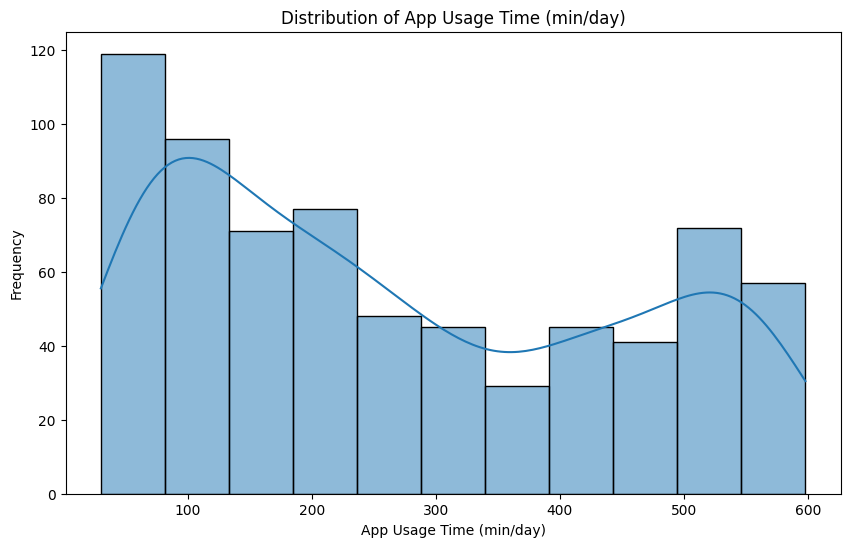

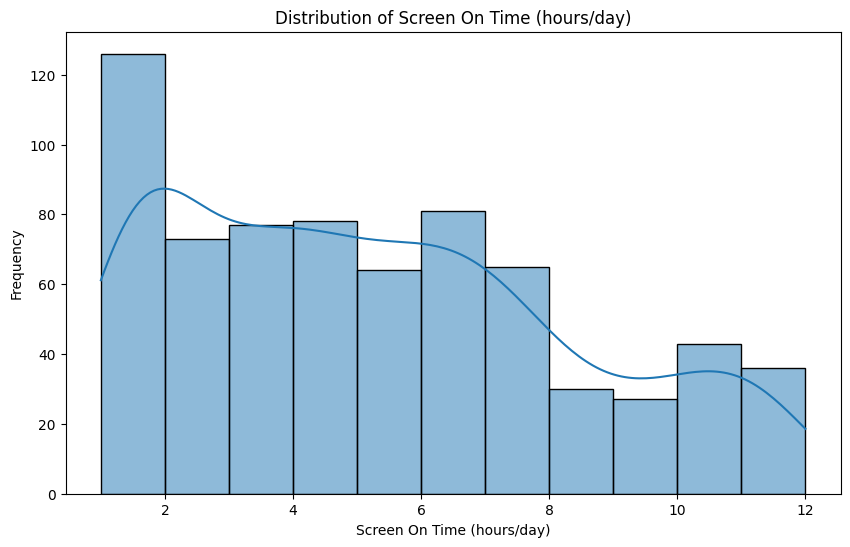

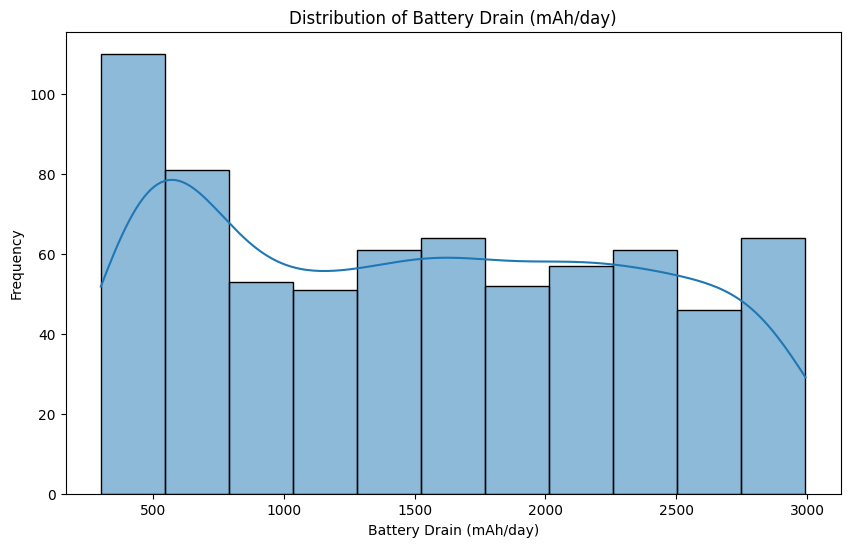

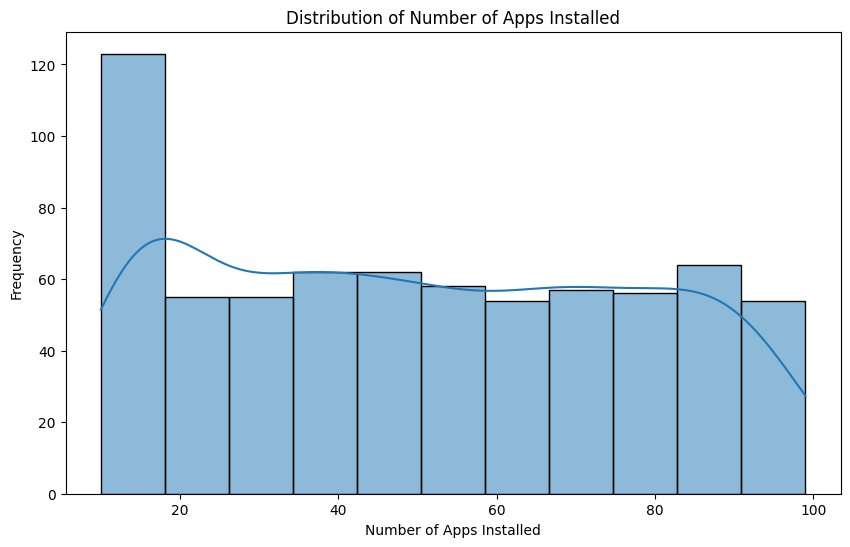

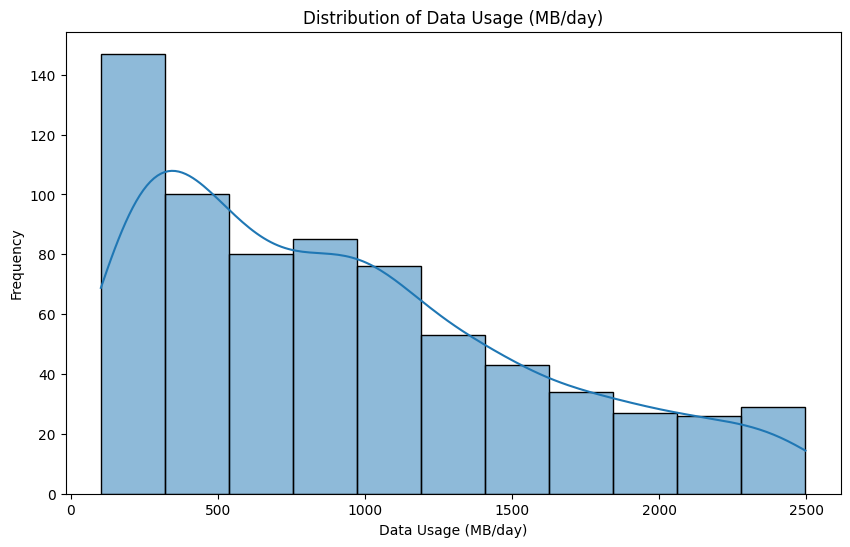

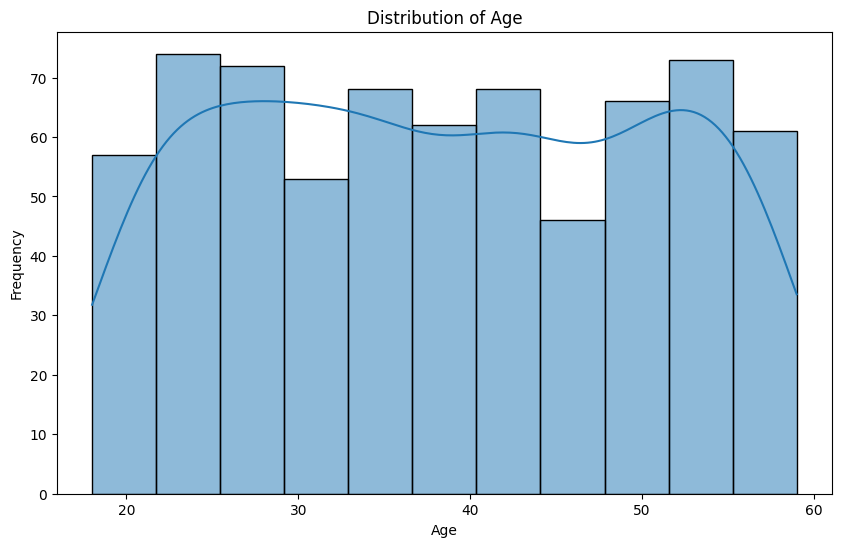

In [22]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show

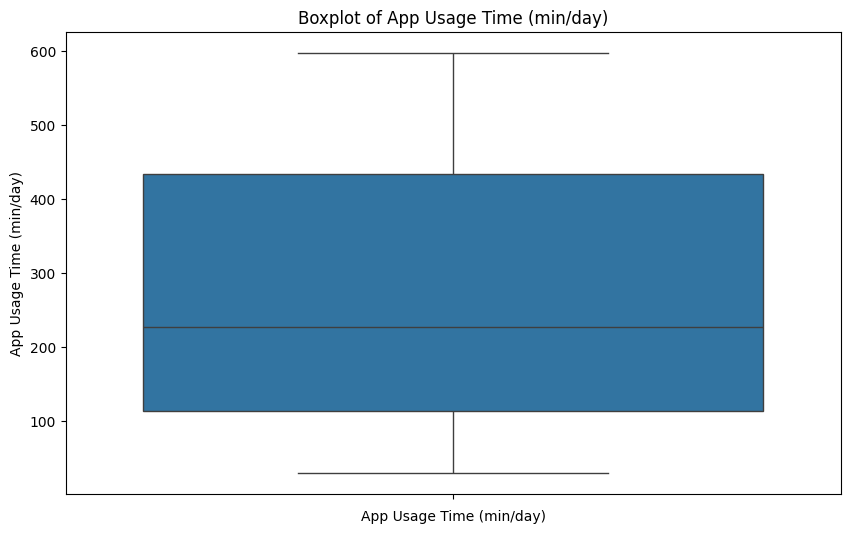

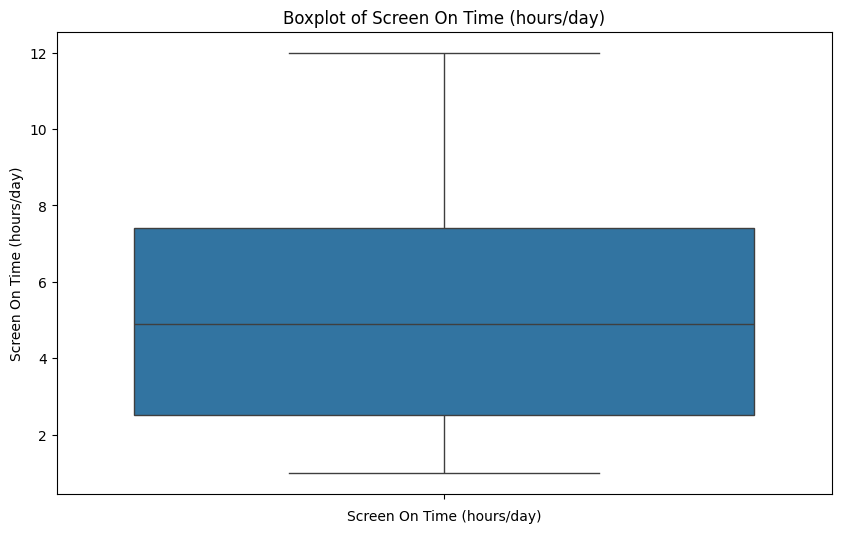

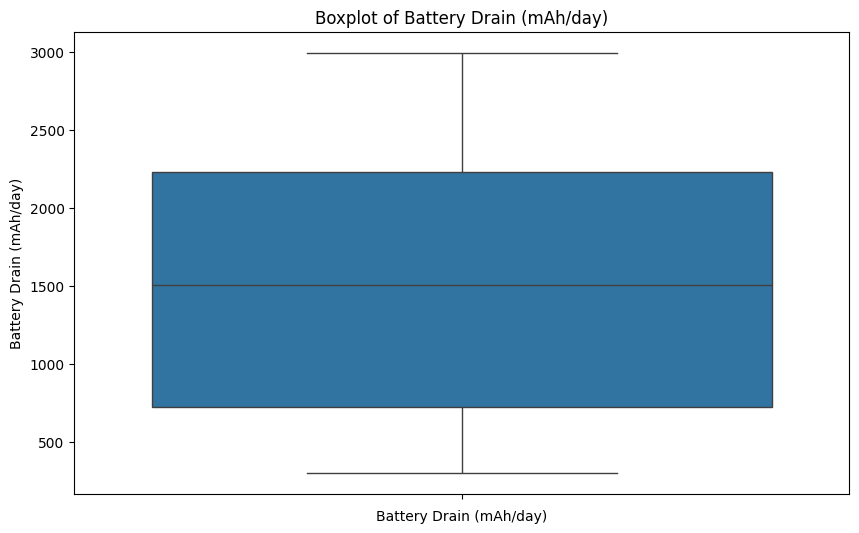

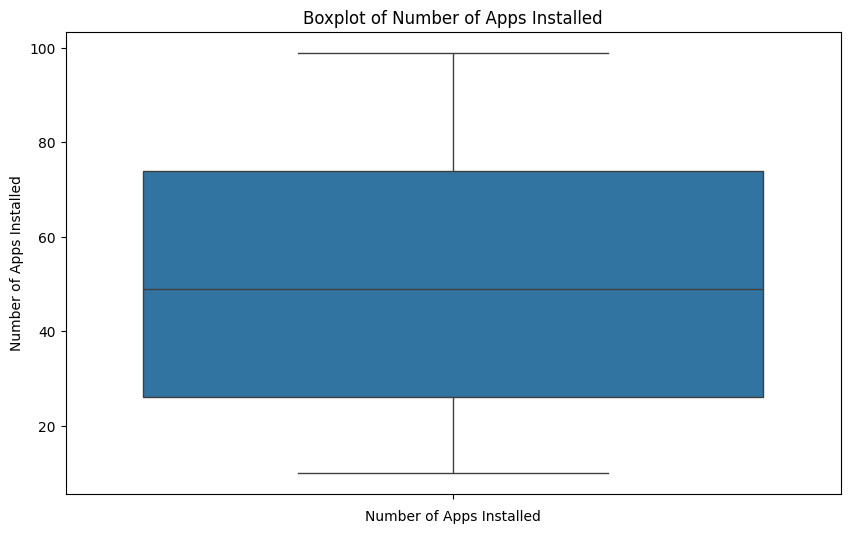

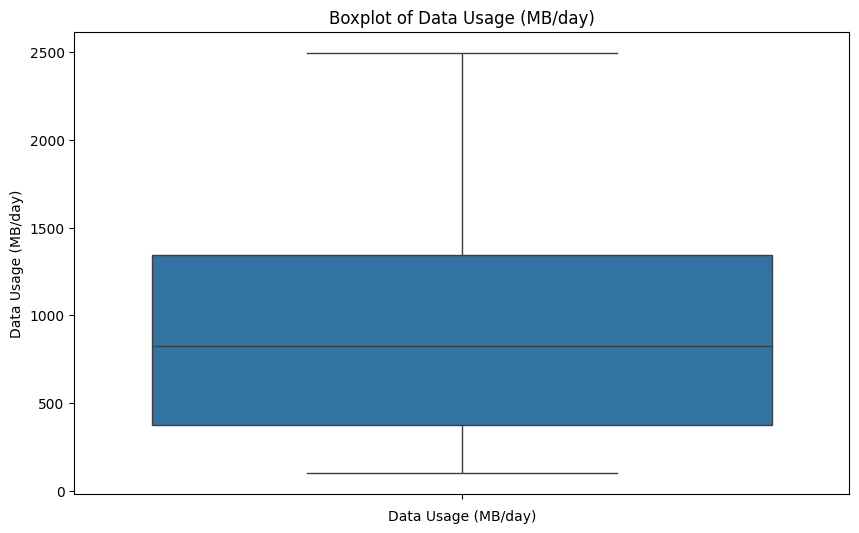

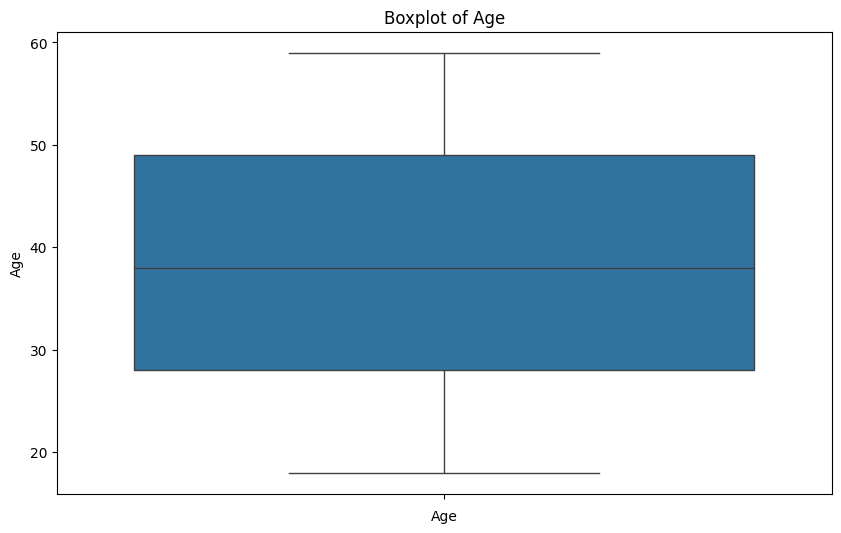

In [23]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show

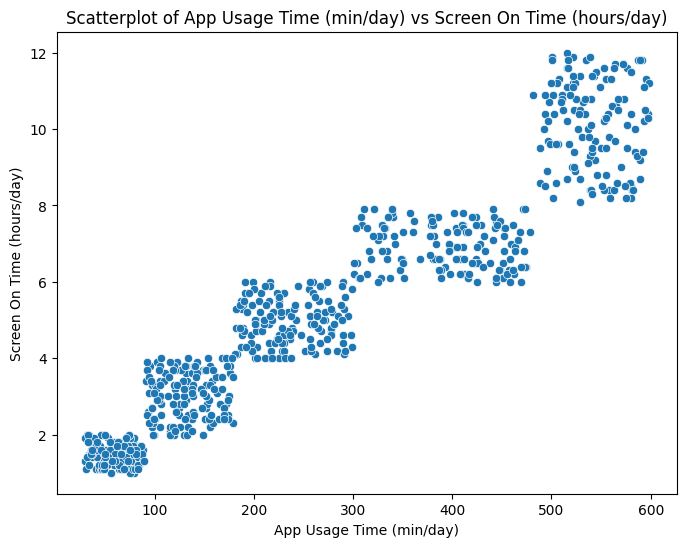

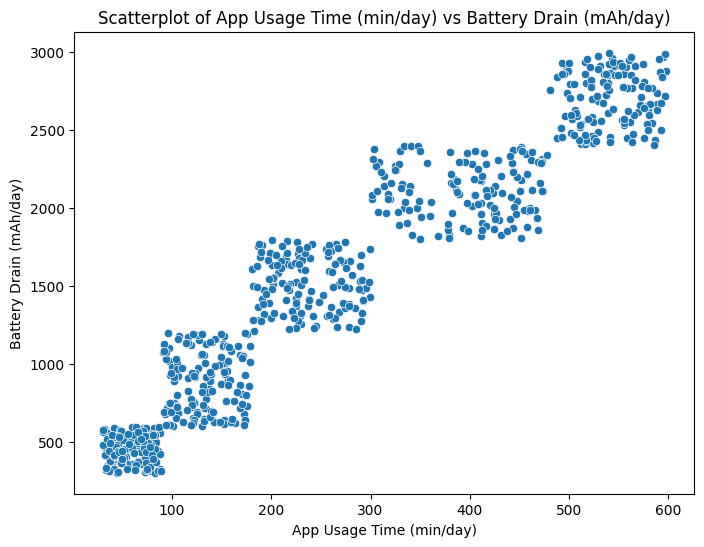

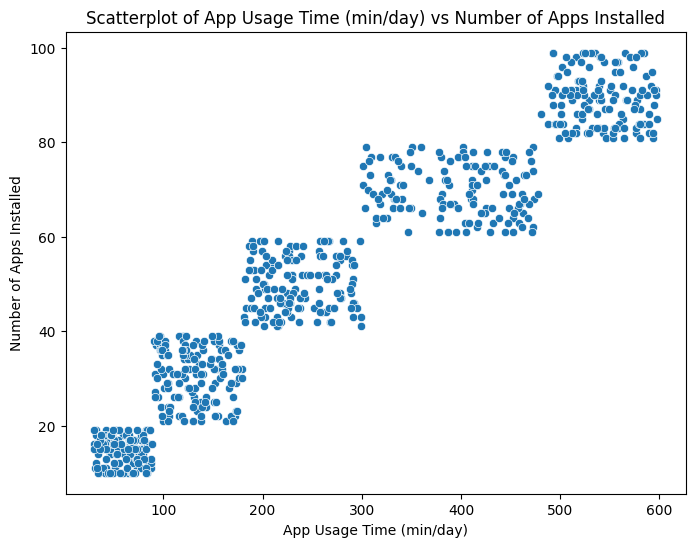

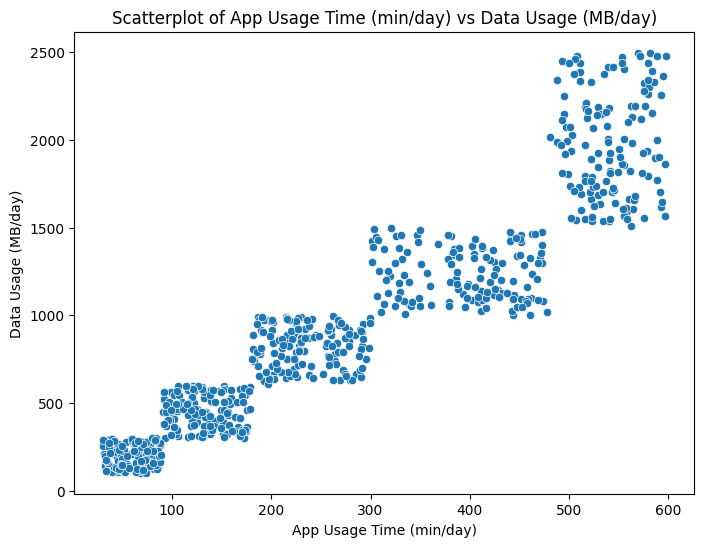

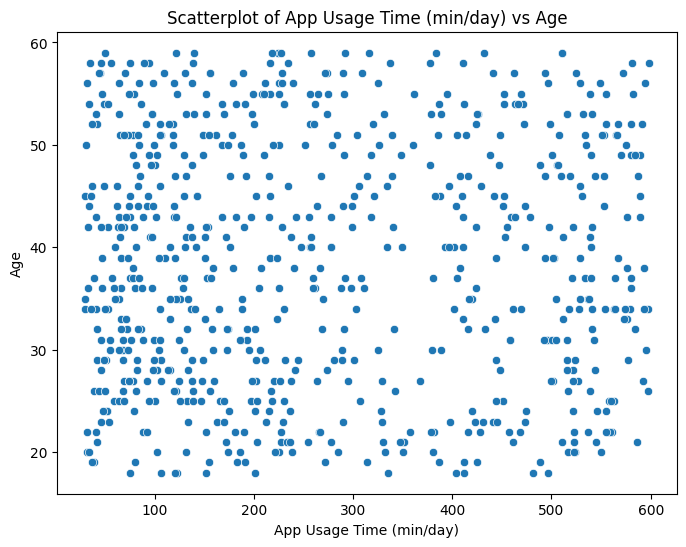

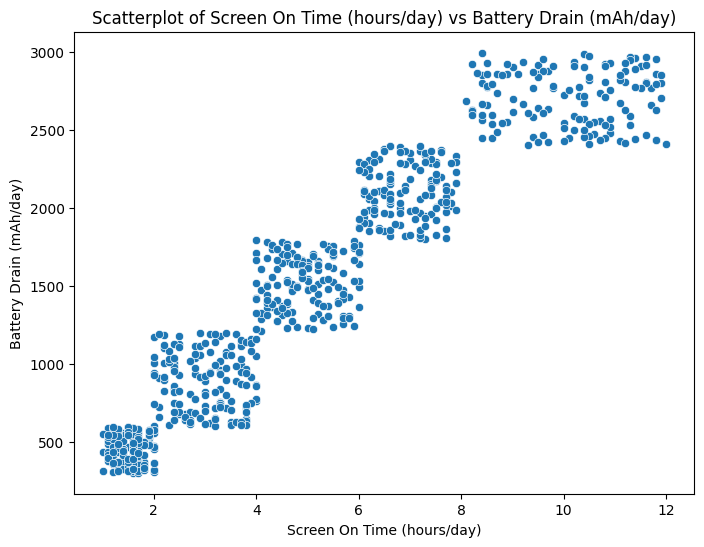

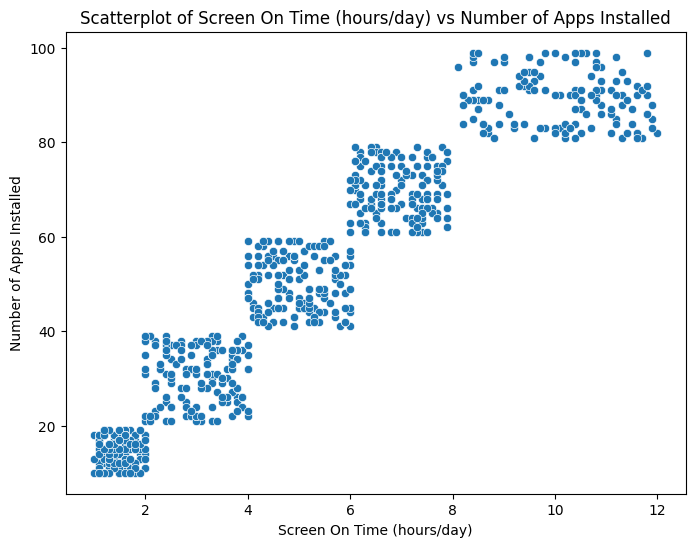

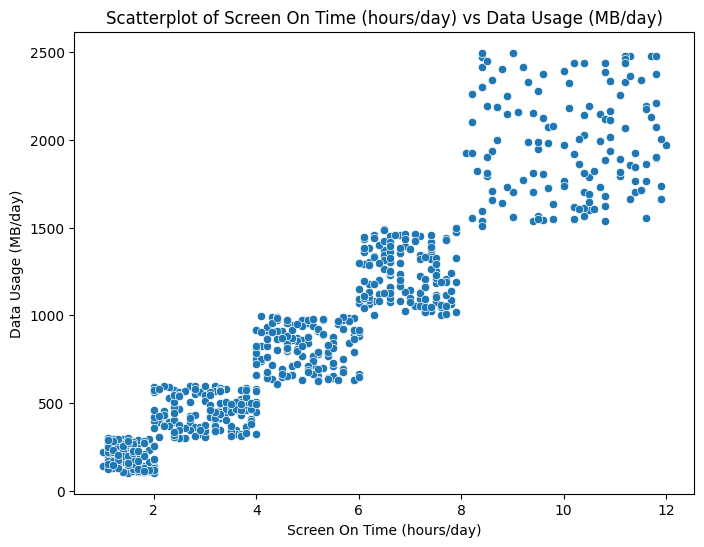

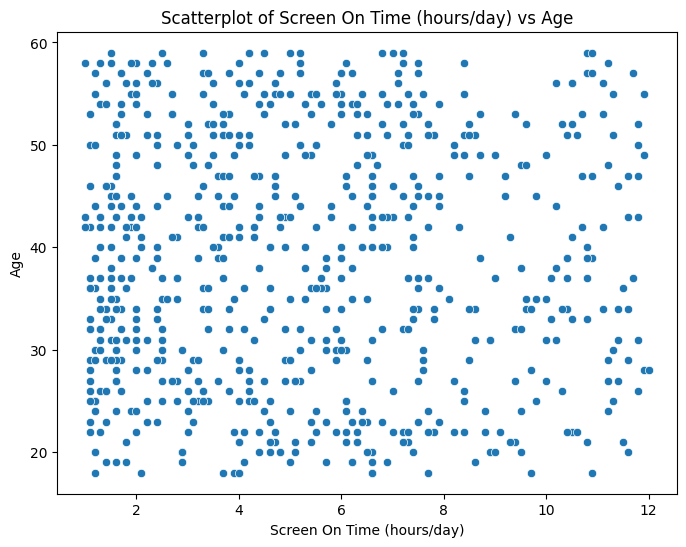

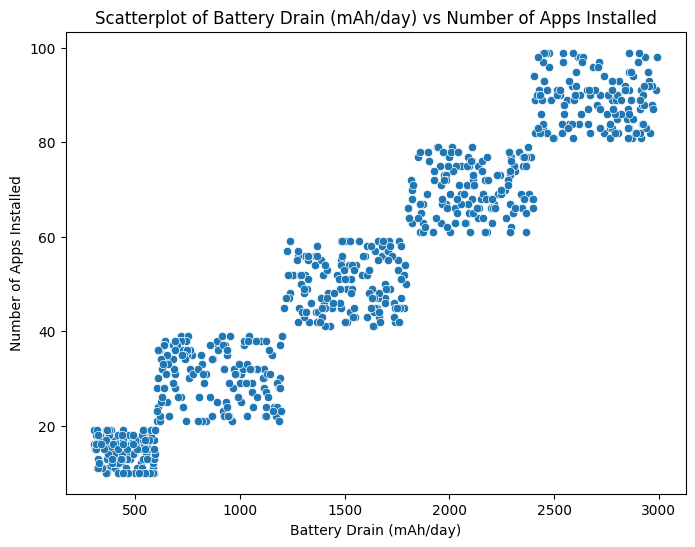

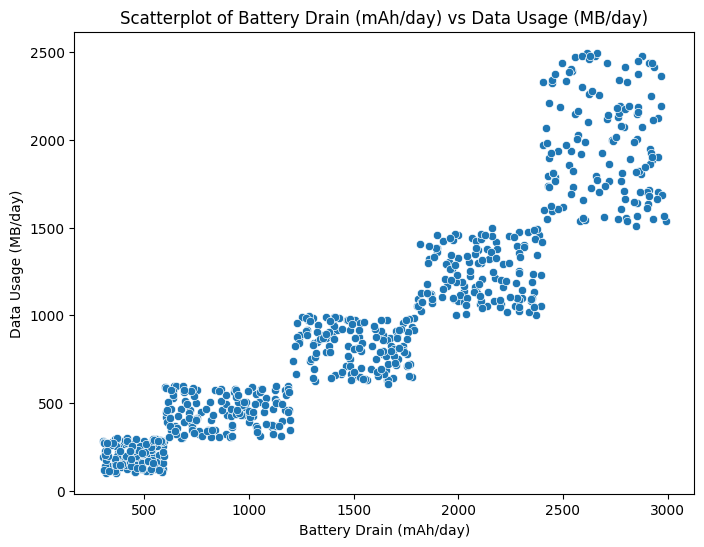

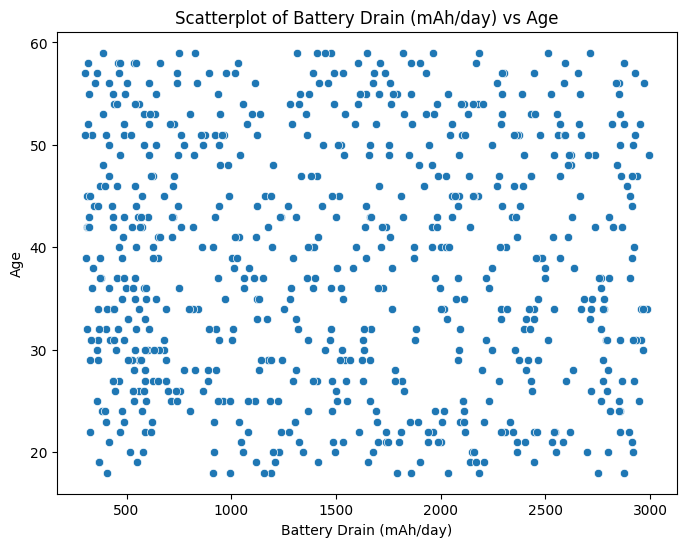

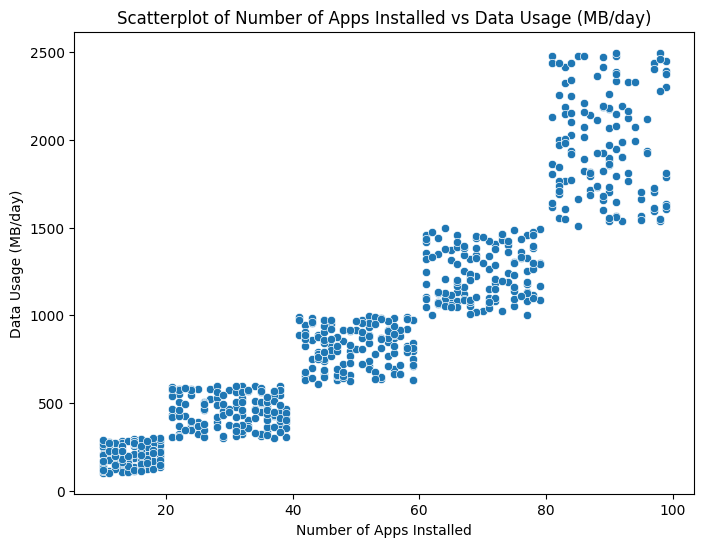

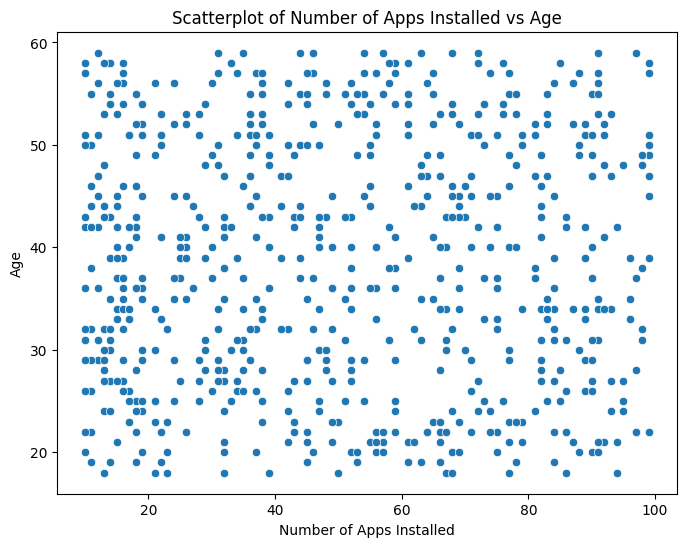

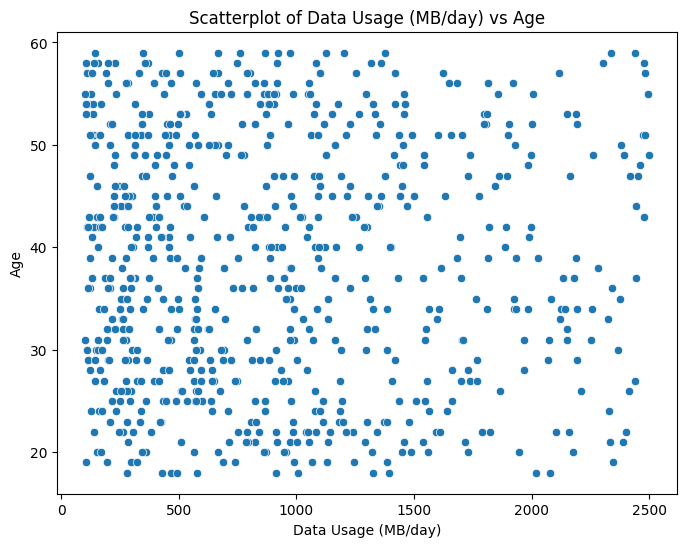

In [24]:
# Plotting between relations

for i in range(len(numerical_columns)): # Iterate through cols
    for j in range(i+1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]
        
        plt.figure(figsize=(8, 6))
        
        sns.scatterplot(x=df[col1], y=df[col2])
        
        plt.title(f'Scatterplot of {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        
        plt.show()
        
        
        


<Figure size 800x600 with 0 Axes>

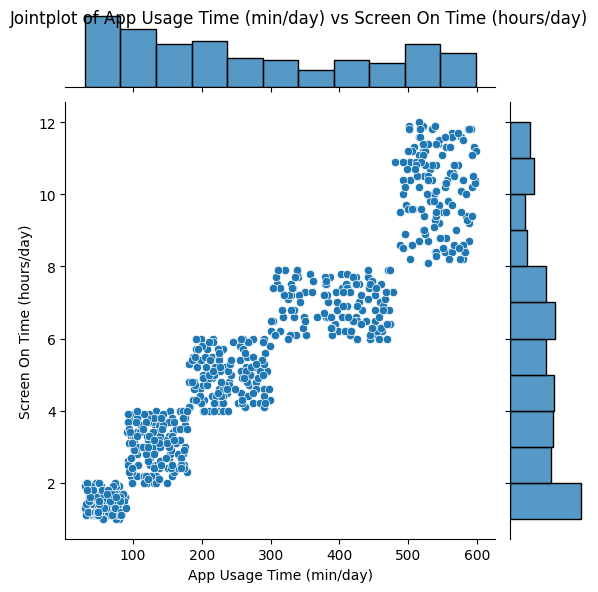

<Figure size 800x600 with 0 Axes>

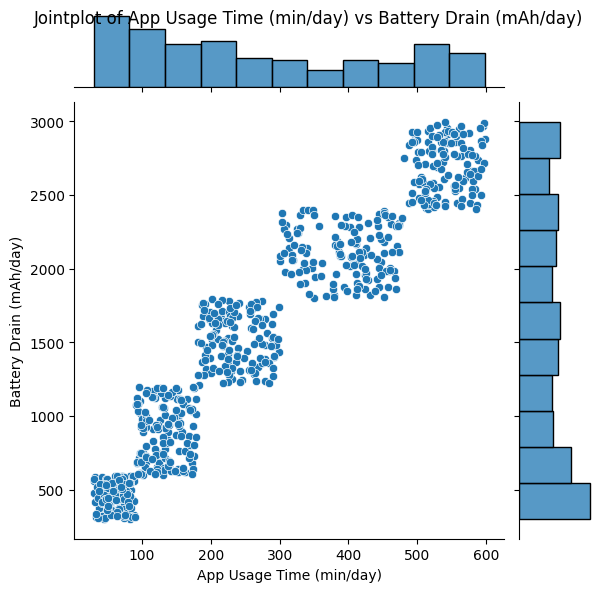

<Figure size 800x600 with 0 Axes>

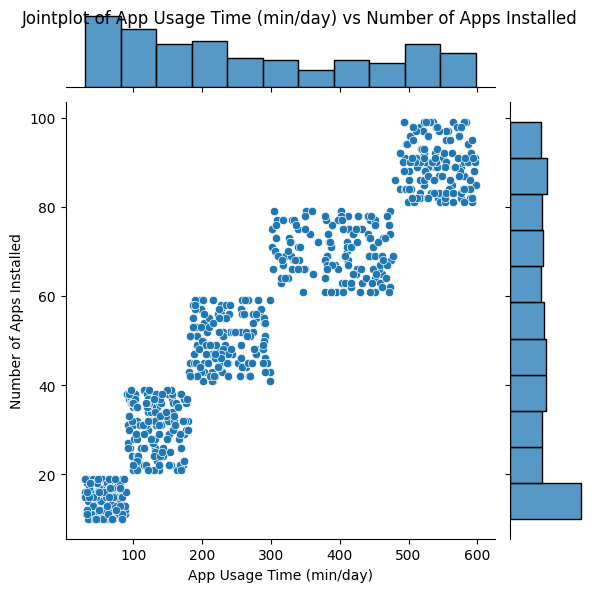

<Figure size 800x600 with 0 Axes>

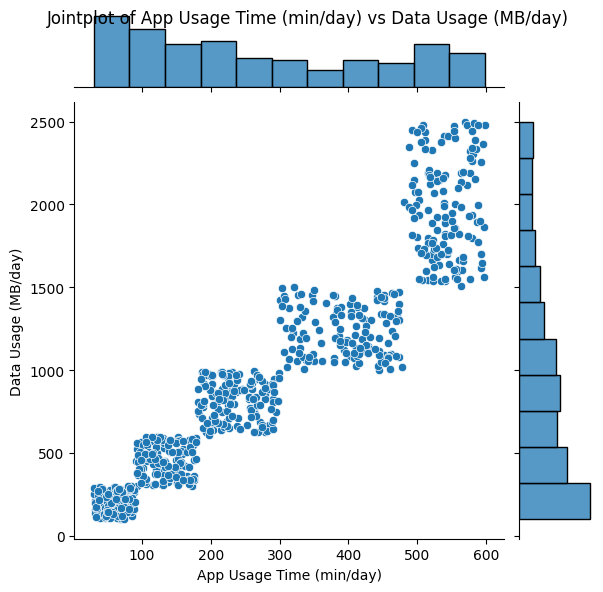

<Figure size 800x600 with 0 Axes>

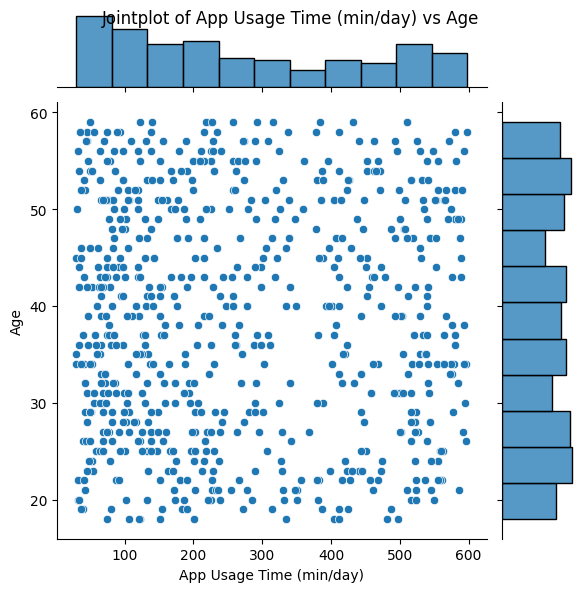

<Figure size 800x600 with 0 Axes>

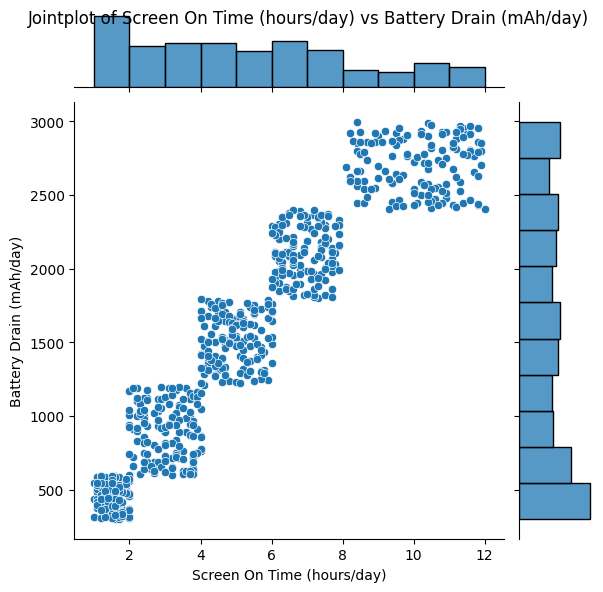

<Figure size 800x600 with 0 Axes>

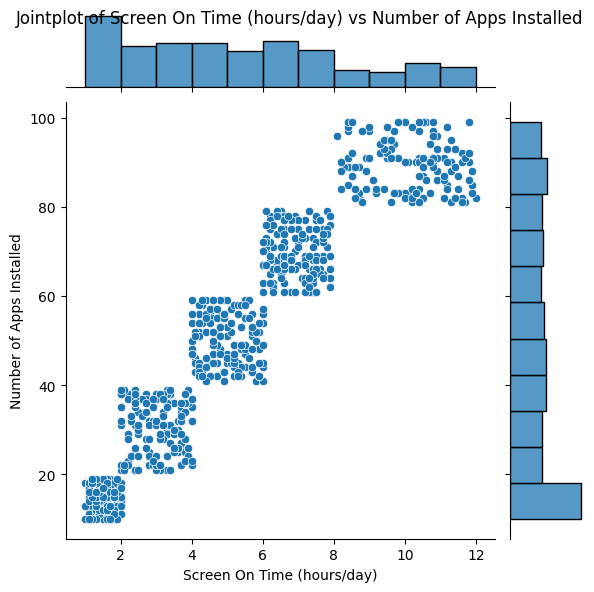

<Figure size 800x600 with 0 Axes>

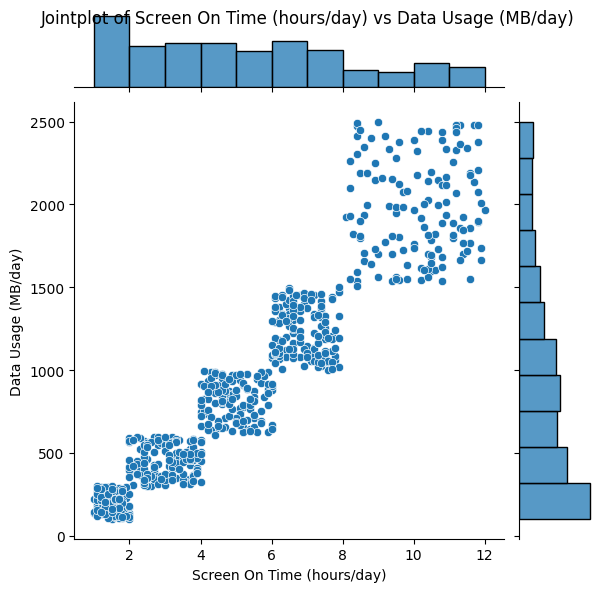

<Figure size 800x600 with 0 Axes>

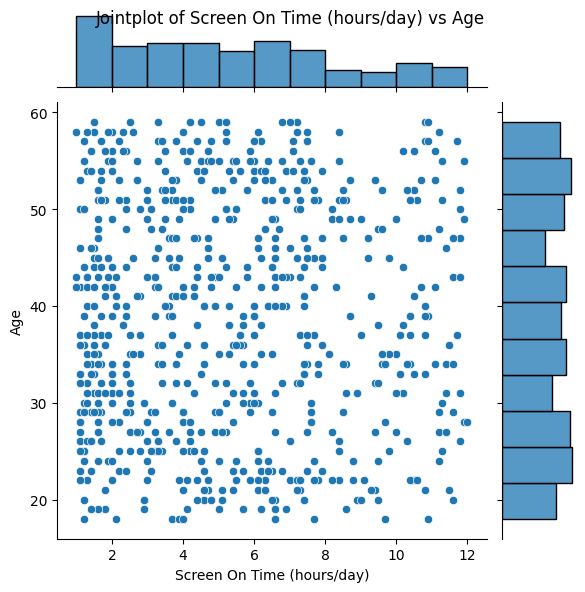

<Figure size 800x600 with 0 Axes>

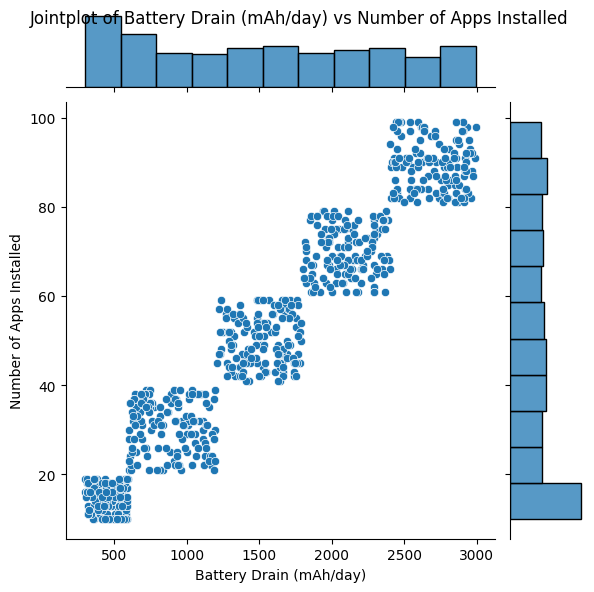

<Figure size 800x600 with 0 Axes>

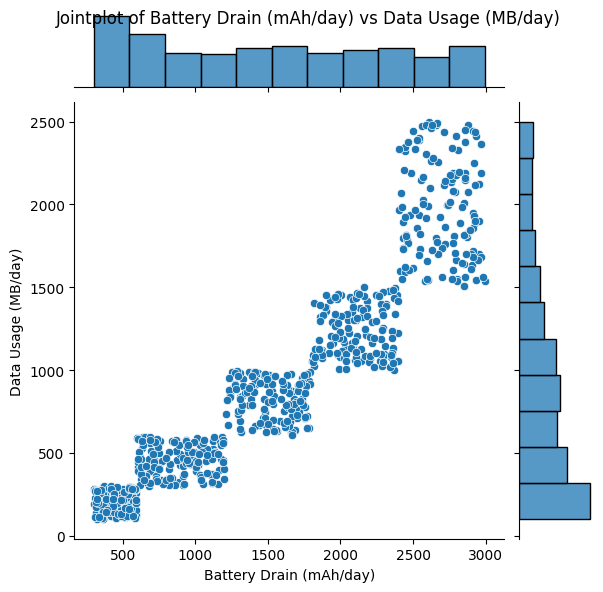

<Figure size 800x600 with 0 Axes>

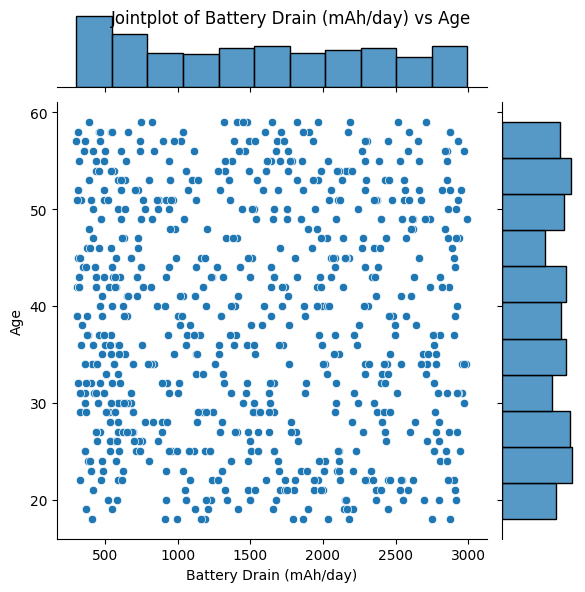

<Figure size 800x600 with 0 Axes>

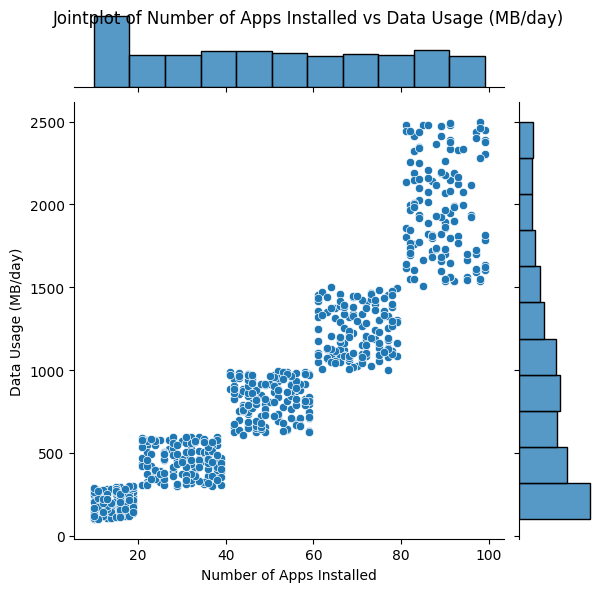

<Figure size 800x600 with 0 Axes>

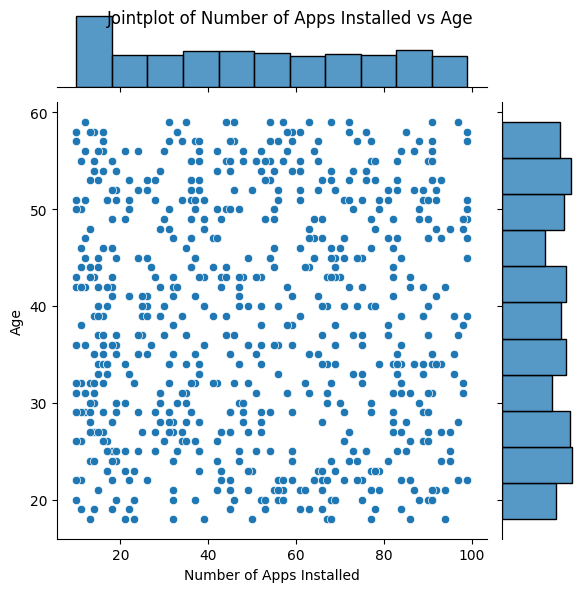

<Figure size 800x600 with 0 Axes>

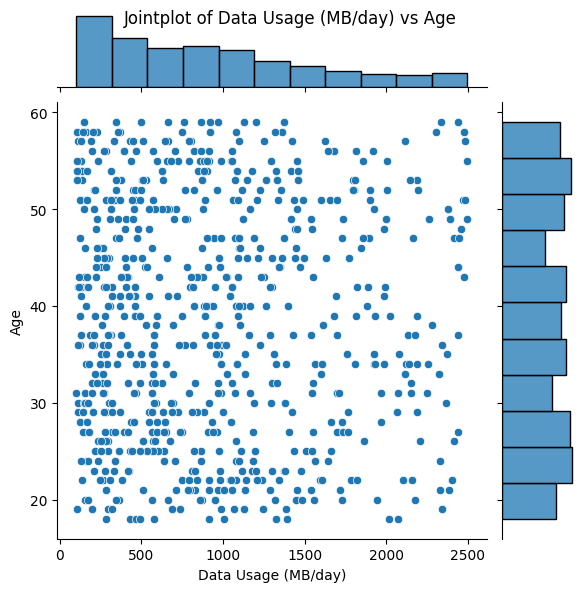

In [25]:
# Visualize the numerical value combinations on a jointplot

for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]
        
        plt.figure(figsize=(8, 6))
        sns.jointplot(x=df[col1], y=df[col2], kind='scatter')
        plt.suptitle(f'Jointplot of {col1} vs {col2}')
        plt.show()
        

In [32]:
# Remove outliers that are outside of q1*1, 5 and q3*1, 5

def remove_outliers_iqr(df, columns):
    df_copy = df.copy()
    
    for column in columns:
        q1 = df_copy[column].quantile(0.25) # Single value
        q3 = df_copy[column].quantile(0.75) # Single value
        IQR = q3 - q1
        lower_bound = q1 - 1.5*IQR
        upper_bound = q3 + 1.5*IQR
        df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)] 
    return df_copy

# numerical_columns is already a list noneed to confert
df = remove_outliers_iqr(df, numerical_columns)

In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
standard = StandardScaler() # Normalize mean and variance
label = LabelEncoder() # Encoding Categorical stuff as integers

for col in categorical_columns:
    df[col] = label.fit_transform(df[col])
    
for col in numerical_columns:
    df[col] = standard.fit_transform(df[[col]])

In [40]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['User Behavior Class', 'Battery Drain (mAh/day)'])
y = df['User Behavior Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(y_train, y_test)


82     4
51     3
220    4
669    2
545    1
      ..
71     5
106    2
270    4
435    2
102    2
Name: User Behavior Class, Length: 560, dtype: int64 158    4
500    1
396    1
155    2
321    3
      ..
24     3
218    5
431    2
281    1
110    2
Name: User Behavior Class, Length: 140, dtype: int64


In [43]:
# Fitting an xgBoost Classifier
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, r2_score

# Create an xgboost classifier
xgb_model = XGBClassifier()
y_train = y_train - 1 # To zero index labels
y_test = y_test - 1 # To Zero index labels


# Train the model
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calculate the MAR and R2 score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE {mae}")
print("R2 score", r2)


print(classification_report(y_test, y_pred))

MAE 0.007142857142857143
R2 score 0.996082820369334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       0.96      1.00      0.98        27
           4       1.00      0.96      0.98        23

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



In [ ]:
# prompt: visualize feature importance



import matplotlib.pyplot as plt



# Assuming 'xgb_model' is your trained XGBoost model

feature_importance = xgb_model.feature_importances_



# Create a DataFrame to store feature importance

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})



feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)



# Plot feature importance

plt.figure(figsize=(10, 6))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

plt.xlabel('Feature Importance')

plt.ylabel('Feature')

plt.title('XGBoost Feature Importance')

plt.show()

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

math.sqrt(0.8) 
np.arange(0, 10, 0.1)

res = []
for i in np.arange(0, 1, 0.01):
    tot = math.sqrt(1-i) + math.sqrt(i)
    res.append(tot)
    
# Plot the results

plt.figure(figsize=(10, 6))

plt.plot(res)

plt.xlabel('Feature Importance')

plt.ylabel('Feature')

plt.title('XGBoost Feature Importance')

plt.show()

ValueError: math domain error